<a href="https://colab.research.google.com/github/madfrog22/Kumpulan-TA/blob/main/OptimizedTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
#reading the data
from sklearn import metrics
import matplotlib.pyplot as plt
import string
string.punctuation
import seaborn as sns


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Read Dataset**

In [ ]:
data_test = pd.read_csv('https://raw.githubusercontent.com/madfrog22/Kumpulan-TA/main/Corona_NLP_test%20-%20Corona_NLP_test.csv',encoding='latin1')
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive
2,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Positive
4,11,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive


In [ ]:
data_train = pd.read_csv("https://raw.githubusercontent.com/madfrog22/Kumpulan-TA/main/Corona_NLP_train%20-%20Corona_NLP_train.csv",encoding='latin1')
data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
1,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
2,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Negative
3,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
4,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative


**Rasio Sentimen Data-Train**

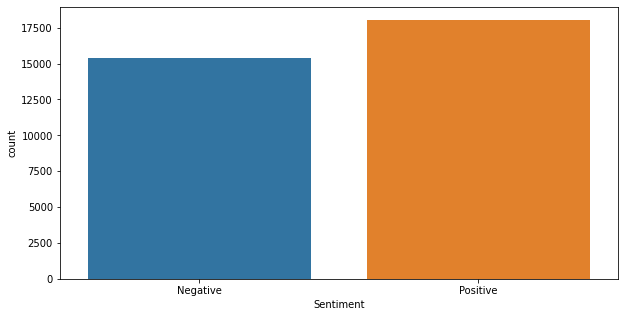

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=data_train, order=['Negative','Positive'])

## **Preprocessing Dataset**

**Lowering Case**

In [ ]:
data_train['OriginalTweet']= data_train['OriginalTweet'].apply(lambda x: x.lower())
data_test['OriginalTweet']=  data_test['OriginalTweet'].apply(lambda x: x.lower())
data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Negative
1,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"for corona prevention,we should stop to buy th...",Negative
2,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Negative
3,3823,48775,Downstage centre,16-03-2020,@10downingstreet @grantshapps what is being do...,Negative
4,3825,48777,"Ketchum, Idaho",16-03-2020,in preparation for higher demand and a potenti...,Negative


**Remove Punctuation**

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

data_train['OriginalTweet']= data_train['OriginalTweet'].apply(lambda x:remove_punctuation(x))
data_test['OriginalTweet'] = data_test['OriginalTweet'].apply(lambda x:remove_punctuation(x))
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetTokenized,msg_lemmatized
0,2,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive,"[couldnt, find, hand, sanit, fred, meyer, turn...","[couldnt, find, hand, sanit, fred, meyer, turn..."
1,3,44955,NaN,02-03-2020,find out how you can protect yourself and love...,Positive,"[find, protect, love, one, coronaviru]","[find, protect, love, one, coronaviru]"
2,7,44959,NaN,03-03-2020,voting in the age of coronavirus hand sanitiz...,Positive,"[vote, age, coronaviru, hand, sanit, supertues...","[vote, age, coronaviru, hand, sanit, supertues..."
3,10,44962,"Dublin, Ireland",04-03-2020,anyone been in a supermarket over the last few...,Positive,"[anyon, supermarket, last, day, went, normal, ...","[anyon, supermarket, last, day, went, normal, ..."
4,11,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive,"[best, qualiti, couch, unbeliev, low, price, a...","[best, qualiti, couch, unbeliev, low, price, a..."


**Tokenization**

In [ ]:
#import tokenizer
tknzr = TweetTokenizer()

data_train['TweetTokenized']= data_train['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x))
data_test['TweetTokenized'] = data_test['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x))
data_test['TweetTokenized'].head()

0    [when, i, couldnt, find, hand, sanitizer, at, ...
1    [find, out, how, you, can, protect, yourself, ...
2    [voting, in, the, age, of, coronavirus, hand, ...
3    [anyone, been, in, a, supermarket, over, the, ...
4    [best, quality, couches, at, unbelievably, low...
Name: TweetTokenized, dtype: object

**Remove Stopwords**

In [ ]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')


#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

data_train['TweetTokenized'] = data_train['TweetTokenized'].apply(lambda x:remove_stopwords(x))
data_test['TweetTokenized'] = data_test['TweetTokenized'].apply(lambda x:remove_stopwords(x))
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetTokenized
0,2,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive,"[couldnt, find, hand, sanitizer, fred, meyer, ..."
1,3,44955,NaN,02-03-2020,find out how you can protect yourself and love...,Positive,"[find, protect, loved, ones, coronavirus]"
2,7,44959,NaN,03-03-2020,voting in the age of coronavirus hand sanitiz...,Positive,"[voting, age, coronavirus, hand, sanitizer, su..."
3,10,44962,"Dublin, Ireland",04-03-2020,anyone been in a supermarket over the last few...,Positive,"[anyone, supermarket, last, days, went, normal..."
4,11,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive,"[best, quality, couches, unbelievably, low, pr..."


**Stemming**

In [ ]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

data_train['TweetTokenized'] = data_train['TweetTokenized'].apply(lambda x: stemming(x))
data_test['TweetTokenized'] = data_test['TweetTokenized'].apply(lambda x: stemming(x))
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetTokenized
0,2,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive,"[couldnt, find, hand, sanit, fred, meyer, turn..."
1,3,44955,NaN,02-03-2020,find out how you can protect yourself and love...,Positive,"[find, protect, love, one, coronaviru]"
2,7,44959,NaN,03-03-2020,voting in the age of coronavirus hand sanitiz...,Positive,"[vote, age, coronaviru, hand, sanit, supertues..."
3,10,44962,"Dublin, Ireland",04-03-2020,anyone been in a supermarket over the last few...,Positive,"[anyon, supermarket, last, day, went, normal, ..."
4,11,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive,"[best, qualiti, couch, unbeliev, low, price, a..."


**Lemmatization**

In [ ]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

data_train['msg_lemmatized']=data_train['TweetTokenized'].apply(lambda x:lemmatizer(x))
data_test['msg_lemmatized'] = data_test['TweetTokenized'].apply(lambda x:lemmatizer(x))

**TF-IDF**

In [ ]:
#buat dummy function untuk menggunakan TfidfVectorizer
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None) 

In [ ]:
tfidf.fit(data_train['msg_lemmatized'])
x_train = tfidf.transform(data_train['msg_lemmatized'])
x_train

<33444x63517 sparse matrix of type '<class 'numpy.float64'>'
	with 635242 stored elements in Compressed Sparse Row format>

**Label Encoding and Making K-Nearest Neighour Classifier**

In [ ]:
#Encode label data train
encoder = LabelEncoder()
y_train = encoder.fit_transform(data_train['Sentiment'])

#Bikin classifier menggunakan knn n=6
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
x_test = tfidf.transform(data_test['msg_lemmatized'])
y_test = encoder.fit_transform(data_test['Sentiment'])
y_test

array([1, 1, 1, ..., 0, 0, 0])

## **Prediction**

In [ ]:
# Prediction
y_pred = knn.predict(x_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1


## **Confussion Matrix**

In [ ]:
cm_knn = metrics.confusion_matrix(y_test, y_pred)
cm_knn

array([[1197,  436],
       [ 627,  919]])

## **Accuracy and Evaluation**

In [ ]:
accKNN = metrics.accuracy_score(y_test, y_pred)
print("Akurasi KNN:",accKNN)
LEvalKnn = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision:",LEvalKnn[0])
print("Recall:",LEvalKnn[1])
print("F1-Score:",LEvalKnn[2])

Akurasi KNN: 0.6656181189053162
Precision: 0.6656181189053162
Recall: 0.6656181189053162
F1-Score: 0.6656181189053162


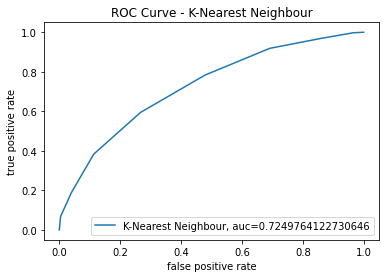

In [ ]:
y_pred_knn_proba = knn.predict_proba(x_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbour, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbour')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()